In [ ]:
pip install pandas xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd


# 1. Bat Density (B)


# 1.1 Raw Table Data (Bat Density)
bat_density_raw = [
    ["Andhra Pradesh", "Pteropus medius known distribution in India.1 No specific density data.", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Arunachal Pradesh", "Pteropus medius likely present in India.1 No specific density data.", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Assam", "Two roosting sites in Guwahati.2 Pteropus medius studied in Assam.3", "Presence confirmed with roosting sites and species study.", "Higher likelihood due to confirmed presence and some population data.", 0.7, "2, 3"],
    ["Bihar", "NiV RNA found in bats.4", "Direct detection of viral RNA in bat population.", "Strong indicator of risk due to confirmed virus presence in bats.", 0.7, "4"],
    ["Chhattisgarh", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Goa", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Gujarat", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Haryana", "Bat dwellings reported in Faridabad.5", "Reported bat dwellings near human habitation.", "Moderate likelihood due to confirmed presence in a specific area.", 0.5, "5"],
    ["Himachal Pradesh", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Jharkhand", "NiV RNA found in bats.4", "Direct detection of viral RNA in bat population.", "Strong indicator of risk due to confirmed virus presence in bats.", 0.7, "4"],
    ["Karnataka", "Anti-Nipah IgG antibodies found in bats.6 Bat populations studied in Shivamogga.7", "Serological evidence and study data.", "Higher likelihood due to evidence of past exposure and study findings.", 0.7, "6"],
    ["Kerala", "Anti-Nipah IgG antibodies found in bats.6 Repeated Nipah virus outbreaks.8", "Serological evidence and outbreak history.", "Very high likelihood due to confirmed virus presence and repeat spillovers.", 0.9, "8"],
    ["Madhya Pradesh", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Maharashtra", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Manipur", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Meghalaya", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Mizoram", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Nagaland", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Odisha", "Odisha mentioned in the context of bat distribution.6", "General mention of bat distribution.", "Slightly higher moderate likelihood due to distribution context.", 0.6, "6"],
    ["Punjab", "Pteropus medius likely present.1 Survey in Punjab mentioned.1", "Indication from survey presence.", "Moderate likelihood due to survey mention.", 0.5, "1"],
    ["Rajasthan", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Sikkim", "Pteropus medius presence less certain in high-altitude region.", "Uncertainty due to geographical factors.", "Lower likelihood due to uncertainty in high-altitude habitat.", 0.3, "–"],
    ["Tamil Nadu", "Anti-Nipah IgG antibodies found in bats.6", "Serological evidence.", "Higher likelihood due to evidence of past exposure.", 0.7, "6"],
    ["Telangana", "Telangana included in bat study.6", "Inclusion in study data.", "Moderate likelihood based on study inclusion.", 0.6, "6"],
    ["Tripura", "Pteropus medius likely present.1", "Presence of reservoir species.", "Moderate likelihood of bat presence without specific density information.", 0.5, "1"],
    ["Uttar Pradesh", "Pteropus medius likely present.1 Bat populations studied in Lakhimpur-Kheri.18", "Study in a specific district.", "Elevated likelihood from localized population study.", 0.6, "18"],
    ["Uttarakhand", "Pteropus medius presence less certain in hilly region.", "Uncertainty due to hilly terrain.", "Lower likelihood due to geographical constraints.", 0.3, "–"],
    ["West Bengal", "NiV RNA found in bats.4 Past Nipah virus outbreaks.9", "Detection of viral RNA and outbreak history.", "High likelihood from confirmed virus presence and outbreak history.", 0.8, "4, 9"]
]
bat_density_raw_df = pd.DataFrame(bat_density_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 1.2 Cleaned Table Data (Bat Density)
bat_density_clean = [
    ["Andhra Pradesh", "Distribution of Pteropus medius (no density)", "Moderate presence of reservoir species", 0.5, "[1]"],
    ["Arunachal Pradesh", "Likely presence of Pteropus medius", "Moderate likelihood from species presence", 0.5, "[1]"],
    ["Assam", "Confirmed roosting sites & species study", "Higher likelihood due to confirmed bat presence", 0.7, "[2], [3]"],
    ["Bihar", "Detection of NiV RNA in bats", "Strong indicator from viral RNA evidence", 0.7, "[4]"],
    ["Chhattisgarh", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Goa", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Gujarat", "Likely presence of Pteropus medius", "Moderate likelihood from species evidence", 0.5, "[1]"],
    ["Haryana", "Bat dwellings in Faridabad", "Moderate likelihood based on local bat dwellings", 0.5, "[5]"],
    ["Himachal Pradesh", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Jharkhand", "Detection of NiV RNA in bats", "Strong indicator from viral RNA evidence", 0.7, "[4]"],
    ["Karnataka", "IgG antibodies & bat study in Shivamogga", "Higher likelihood due to serological evidence", 0.7, "[6]"],
    ["Kerala", "IgG antibodies & repeated outbreaks", "Very high likelihood due to serology and outbreaks", 0.9, "[8]"],
    ["Madhya Pradesh", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Maharashtra", "Likely presence of Pteropus medius", "Moderate likelihood from species evidence", 0.5, "[1]"],
    ["Manipur", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Meghalaya", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Mizoram", "Likely presence of Pteropus medius", "Moderate likelihood from species evidence", 0.5, "[1]"],
    ["Nagaland", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Odisha", "Mention of bat distribution", "Slightly elevated likelihood from distribution context", 0.6, "[6]"],
    ["Punjab", "Species presence noted via survey", "Moderate likelihood based on survey evidence", 0.5, "[1]"],
    ["Rajasthan", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Sikkim", "Uncertain presence in high-altitude region", "Lower likelihood due to altitude-related uncertainty", 0.3, "–"],
    ["Tamil Nadu", "IgG antibodies detected in bats", "Higher likelihood from serological evidence", 0.7, "[6]"],
    ["Telangana", "Inclusion in bat study", "Moderate likelihood based on study inclusion", 0.6, "[6]"],
    ["Tripura", "Likely presence of Pteropus medius", "Moderate likelihood from reservoir data", 0.5, "[1]"],
    ["Uttar Pradesh", "Study in Lakhimpur-Kheri", "Elevated likelihood from localized study", 0.6, "[18]"],
    ["Uttarakhand", "Uncertain presence in hilly region", "Lower likelihood due to geographical constraints", 0.3, "–"],
    ["West Bengal", "Viral RNA detection & outbreak history", "High likelihood from virological and outbreak evidence", 0.8, "[4], [9]"]
]
bat_density_clean_df = pd.DataFrame(bat_density_clean,
    columns=["State", "Key Bat Indicator", "Likelihood Interpretation", "Score", "Reference"])


# 2. Pig Farming Intensity (P)

# 2.1 Raw Table Data (Pig Farming)
pig_farming_raw = [
    ["Andhra Pradesh", "~1% of total pig population in India (91,958 in 2019).19 Pig meat production 1.680 Ton th in 2021.20", "Low proportion of national population.", "Moderate intensity due to relatively low numbers.", 0.4, "20"],
    ["Arunachal Pradesh", "No specific data found. General understanding of lower prevalence.", "Lack of specific data.", "Low intensity based on general knowledge.", 0.3, "–"],
    ["Assam", "Highest pig population in India.21", "Highest national population.", "Very high intensity due to leading population numbers.", 0.9, "21"],
    ["Bihar", "Significant pig population.21", "Mention of significant population.", "High intensity due to substantial population.", 0.8, "21"],
    ["Chhattisgarh", "Pig farming present.22", "Presence of pig farming.", "Moderate intensity due to general presence.", 0.4, "22"],
    ["Goa", "Agonda Goan breed found in Goa.26", "Presence of a specific breed.", "Moderate intensity due to local breed presence.", 0.4, "26"],
    ["Gujarat", "Pig farming present.20", "Presence noted.", "Low intensity given relatively lower production.", 0.3, "20"],
    ["Haryana", "Pig farming present.20", "Presence noted.", "Moderate intensity due to general presence.", 0.5, "20"],
    ["Himachal Pradesh", "Low pig farming.20", "Explicit mention of low farming.", "Low intensity per available data.", 0.2, "20"],
    ["Jharkhand", "Significant pig population.21", "Significant presence mentioned.", "High intensity from substantial population.", 0.8, "21"],
    ["Karnataka", "Pig farming present.20", "General presence of pig farming.", "Moderate intensity from general presence.", 0.5, "20"],
    ["Kerala", "Pig farming present.20", "General presence indicated.", "Moderate intensity from overall presence.", 0.5, "20"],
    ["Madhya Pradesh", "Pig farming present.20", "Presence noted.", "Moderate intensity from general presence.", 0.4, "20"],
    ["Maharashtra", "Pig farming present.20", "Presence noted.", "Moderate intensity given general presence.", 0.5, "20"],
    ["Manipur", "Pig farming present.20", "Presence noted.", "Moderate intensity due to general farming.", 0.4, "20"],
    ["Meghalaya", "Significant pig population.20", "Significant presence mentioned.", "High intensity due to substantial population.", 0.7, "20"],
    ["Mizoram", "Significant pig population.20", "Significant presence mentioned.", "High intensity due to substantial population.", 0.7, "20"],
    ["Nagaland", "Significant pig population.20", "Significant presence mentioned.", "High intensity due to substantial population.", 0.7, "20"],
    ["Odisha", "Pig farming present.20", "Presence noted.", "Moderate intensity from general presence.", 0.4, "20"],
    ["Punjab", "Pig farming present.20", "Presence noted.", "Moderate intensity given general presence.", 0.5, "20"],
    ["Rajasthan", "Low pig farming.20", "Explicit mention of low farming.", "Low intensity as described.", 0.2, "20"],
    ["Sikkim", "No specific data found.", "Data not available.", "Low intensity pending more information.", 0.2, "–"],
    ["Tamil Nadu", "Pig farming present.20", "Presence noted.", "Moderate intensity due to overall presence.", 0.5, "20"],
    ["Telangana", "Pig farming present.20", "Presence noted.", "Moderate intensity from general presence.", 0.4, "20"],
    ["Tripura", "Pig farming present.20", "Presence noted.", "Moderate intensity from general presence.", 0.4, "20"],
    ["Uttar Pradesh", "Significant pig population.21 Highest pig meat production.23", "Both high population and production.", "Very high intensity from leading production numbers.", 0.8, "21"],
    ["Uttarakhand", "Low pig farming.20", "Explicit mention of low farming.", "Low intensity as noted.", 0.2, "20"],
    ["West Bengal", "Significant pig population.20", "Significant presence mentioned.", "High intensity due to substantial population.", 0.7, "20"]
]
pig_farming_raw_df = pd.DataFrame(pig_farming_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 2.2 Cleaned Table Data (Pig Farming)
pig_farming_clean = [
    ["Andhra Pradesh", "~1% of national pig population", "Low proportion; moderate intensity", 0.4, "[20]"],
    ["Arunachal Pradesh", "Data not available", "Generally low intensity based on understanding", 0.3, "–"],
    ["Assam", "Highest pig population", "Very high intensity from leading numbers", 0.9, "[21]"],
    ["Bihar", "Significant pig population", "High intensity from substantial numbers", 0.8, "[21]"],
    ["Chhattisgarh", "Presence of pig farming", "Moderate intensity from basic presence", 0.4, "[22]"],
    ["Goa", "Local breed (Agonda Goan)", "Moderate intensity from breed-specific data", 0.4, "[26]"],
    ["Gujarat", "Pig farming noted", "Low intensity from lower production", 0.3, "[20]"],
    ["Haryana", "Pig farming noted", "Moderate intensity from general presence", 0.5, "[20]"],
    ["Himachal Pradesh", "Low pig farming", "Very low intensity as stated", 0.2, "[20]"],
    ["Jharkhand", "Significant pig population", "High intensity from substantial numbers", 0.8, "[21]"],
    ["Karnataka", "Pig farming noted", "Moderate intensity", 0.5, "[20]"],
    ["Kerala", "Pig farming noted", "Moderate intensity", 0.5, "[20]"],
    ["Madhya Pradesh", "Pig farming noted", "Moderate intensity", 0.4, "[20]"],
    ["Maharashtra", "Pig farming noted", "Moderate intensity", 0.5, "[20]"],
    ["Manipur", "Pig farming noted", "Moderate intensity", 0.4, "[20]"],
    ["Meghalaya", "Significant pig population", "High intensity from substantial numbers", 0.7, "[20]"],
    ["Mizoram", "Significant pig population", "High intensity from substantial numbers", 0.7, "[20]"],
    ["Nagaland", "Significant pig population", "High intensity from substantial numbers", 0.7, "[20]"],
    ["Odisha", "Pig farming noted", "Moderate intensity", 0.4, "[20]"],
    ["Punjab", "Pig farming noted", "Moderate intensity", 0.5, "[20]"],
    ["Rajasthan", "Low pig farming", "Low intensity as described", 0.2, "[20]"],
    ["Sikkim", "Data not available", "Low intensity pending further data", 0.2, "–"],
    ["Tamil Nadu", "Pig farming noted", "Moderate intensity", 0.5, "[20]"],
    ["Telangana", "Pig farming noted", "Moderate intensity", 0.4, "[20]"],
    ["Tripura", "Pig farming noted", "Moderate intensity", 0.4, "[20]"],
    ["Uttar Pradesh", "Significant pig population & high production", "Very high intensity from production dominance", 0.8, "[21]"],
    ["Uttarakhand", "Low pig farming", "Low intensity as stated", 0.2, "[20]"],
    ["West Bengal", "Significant pig population", "High intensity from substantial numbers", 0.7, "[20]"]
]
pig_farming_clean_df = pd.DataFrame(pig_farming_clean,
    columns=["State", "Pig Farming Indicator", "Intensity Interpretation", "Score", "Reference"])

# 3. Fruit Consumption Practices (F)


# 3.1 Raw Table Data (Fruit Consumption)
fruit_raw = [
    ["Andhra Pradesh", "Major fruit-producing state.27 Major fruits include banana and mango.29", "High fruit production, including bat-favored fruits.", "High consumption potential from significant fruit production.", 0.7, "27"],
    ["Arunachal Pradesh", "No specific data found. Hilly terrain suggests potential for fruit cultivation.", "Lack of specific data; relies on terrain context.", "Moderate potential based on probable cultivation.", 0.5, "–"],
    ["Assam", "Fruit production present.30 Pteropus medius is frugivorous.3", "Presence of fruit production and frugivorous bats.", "Moderate potential due to combined factors.", 0.6, "30"],
    ["Bihar", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general fruit availability.", 0.5, "30"],
    ["Chhattisgarh", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general fruit availability.", 0.5, "30"],
    ["Goa", "Fruit production present.30", "Fruit production noted.", "Moderate–high potential from fruit availability.", 0.6, "30"],
    ["Gujarat", "Major fruit producer.31", "High fruit production noted.", "High consumption potential due to significant production.", 0.7, "31"],
    ["Haryana", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general fruit availability.", 0.5, "30"],
    ["Himachal Pradesh", "Fruit production present.30", "Fruit production noted.", "Moderate–high potential based on production levels.", 0.6, "30"],
    ["Jharkhand", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general fruit availability.", 0.5, "30"],
    ["Karnataka", "Major fruit producer.31", "High fruit production noted.", "High consumption potential from significant production.", 0.7, "31"],
    ["Kerala", "Major fruit producer.30 High fruit consumption.32", "High production and consumption noted.", "Very high potential due to both production and consumption.", 0.8, "30"],
    ["Madhya Pradesh", "Major fruit producer.30", "High fruit production noted.", "High potential from significant production.", 0.7, "30"],
    ["Maharashtra", "Major fruit producer.31", "High fruit production noted.", "High potential from significant production.", 0.7, "31"],
    ["Manipur", "Fruit production present.30", "Fruit production noted.", "Moderate potential from available production.", 0.5, "30"],
    ["Meghalaya", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["Mizoram", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["Nagaland", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["Odisha", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["Punjab", "Major fruit producer.30", "High production noted.", "Moderate–high potential from significant production.", 0.6, "30"],
    ["Rajasthan", "Fruit production present.30 Highest increase in area sown under fruits.33", "Increased cultivation noted.", "Moderate–high potential from expanding cultivation.", 0.6, "30"],
    ["Sikkim", "Fruit production present.30 Highest increase in fruit production.33", "Increased production noted.", "Moderate–high potential given rapid growth.", 0.6, "30"],
    ["Tamil Nadu", "Major fruit producer.31 Decrease in daily fruit intake.34 Low fruit consumption.32", "Contrasting production vs. consumption data.", "Moderate-high potential; production high but consumption lower.", 0.6, "31"],
    ["Telangana", "Fruit production present.30 Increase in daily fruit intake.34", "Increased consumption noted.", "Moderate potential from improved intake.", 0.6, "30"],
    ["Tripura", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["Uttar Pradesh", "Major fruit producer.30", "High production noted.", "Moderate-high potential from significant production.", 0.6, "30"],
    ["Uttarakhand", "Fruit production present.30", "Fruit production noted.", "Moderate potential from general availability.", 0.5, "30"],
    ["West Bengal", "Fruit production present.30", "Fruit production noted.", "Moderate-high potential from available production.", 0.6, "30"]
]
fruit_raw_df = pd.DataFrame(fruit_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 3.2 Cleaned Table Data (Fruit Consumption)
fruit_clean = [
    ["Andhra Pradesh", "Major fruit producer", "High potential based on significant production", 0.7, "[27]"],
    ["Arunachal Pradesh", "Data not available", "Moderate potential inferred from hilly terrain", 0.5, "–"],
    ["Assam", "Notable fruit production", "Moderate potential enhanced by frugivorous bat presence", 0.6, "[30]"],
    ["Bihar", "General fruit production", "Moderate potential from available production", 0.5, "[30]"],
    ["Chhattisgarh", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Goa", "Fruit production noted", "Moderate–high potential from fruit availability", 0.6, "[30]"],
    ["Gujarat", "Major fruit producer", "High production leads to high consumption potential", 0.7, "[31]"],
    ["Haryana", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Himachal Pradesh", "Fruit production noted", "Moderate–high potential from production levels", 0.6, "[30]"],
    ["Jharkhand", "Fruit production noted", "Moderate potential from available production", 0.5, "[30]"],
    ["Karnataka", "Major fruit producer", "High potential from significant production", 0.7, "[31]"],
    ["Kerala", "Major producer with high consumption", "Very high potential from both production and consumption", 0.8, "[30]"],
    ["Madhya Pradesh", "Major fruit producer", "High potential from significant production", 0.7, "[30]"],
    ["Maharashtra", "Major fruit producer", "High potential from significant production", 0.7, "[31]"],
    ["Manipur", "Fruit production noted", "Moderate potential based on available production", 0.5, "[30]"],
    ["Meghalaya", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Mizoram", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Nagaland", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Odisha", "Fruit production noted", "Moderate potential from available production", 0.5, "[30]"],
    ["Punjab", "Major fruit producer", "Moderate–high potential from significant production", 0.6, "[30]"],
    ["Rajasthan", "Expanding fruit cultivation", "Moderate–high potential from increased cultivation area", 0.6, "[30]"],
    ["Sikkim", "Rapidly growing fruit production", "Moderate–high potential given recent production increases", 0.6, "[30]"],
    ["Tamil Nadu", "Major fruit producer with lower intake", "Moderate-high potential; production high but consumption low", 0.6, "[31]"],
    ["Telangana", "Increasing fruit consumption", "Moderate potential from improved daily intake", 0.6, "[30]"],
    ["Tripura", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["Uttar Pradesh", "Major fruit producer", "Moderate-high potential from significant production", 0.6, "[30]"],
    ["Uttarakhand", "Fruit production noted", "Moderate potential from general availability", 0.5, "[30]"],
    ["West Bengal", "Fruit production noted", "Moderate-high potential from available production", 0.6, "[30]"]
]
fruit_clean_df = pd.DataFrame(fruit_clean,
    columns=["State", "Key Fruit Indicator", "Consumption/Potential Interpretation", "Score", "Reference"])

# 4. Human Population Density (H)


# 4.1 Raw Table Data (Human Population Density)
pop_density_raw = [
    ["Andhra Pradesh", "304-307 per km² 35", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "35"],
    ["Arunachal Pradesh", "Very low (not specified in snippets).", "Very low density.", "Low risk of human-to-human transmission.", 0.2, "–"],
    ["Assam", "397 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Bihar", "1102 per km² 37", "Very high density.", "Very high risk of human-to-human transmission.", 0.9, "37"],
    ["Chhattisgarh", "236 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Goa", "394 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Gujarat", "308 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Haryana", "573 per km² 37", "High density.", "High risk of human-to-human transmission.", 0.7, "37"],
    ["Himachal Pradesh", "123 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Jharkhand", "414 per km² 37", "High density.", "High risk of human-to-human transmission.", 0.7, "37"],
    ["Karnataka", "319 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Kerala", "860 per km² 37", "Very high density.", "Very high risk of human-to-human transmission.", 0.9, "37"],
    ["Madhya Pradesh", "236 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Maharashtra", "365 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Manipur", "128 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Meghalaya", "132 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Mizoram", "52 per km² 37", "Low density.", "Low risk of human-to-human transmission.", 0.3, "37"],
    ["Nagaland", "119 per km² 37", "Low density.", "Low risk of human-to-human transmission.", 0.3, "37"],
    ["Odisha", "269 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Punjab", "550 per km² 37", "High density.", "High risk of human-to-human transmission.", 0.7, "37"],
    ["Rajasthan", "201 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.5, "37"],
    ["Sikkim", "86 per km² 37", "Very low density.", "Low risk of human-to-human transmission.", 0.2, "37"],
    ["Tamil Nadu", "555 per km² 37", "High density.", "High risk of human-to-human transmission.", 0.7, "37"],
    ["Telangana", "350 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Tripura", "350 per km² 37", "Moderate density.", "Moderate risk of human-to-human transmission.", 0.6, "37"],
    ["Uttar Pradesh", "828 per km² 37", "Very high density.", "Very high risk of human-to-human transmission.", 0.9, "37"],
    ["Uttarakhand", "189 per km² 37", "Low density.", "Low risk of human-to-human transmission.", 0.4, "37"],
    ["West Bengal", "1029 per km² 37", "Very high density.", "Very high risk of human-to-human transmission.", 0.9, "37"]
]
pop_density_raw_df = pd.DataFrame(pop_density_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 4.2 Cleaned Table Data (Human Population Density)
pop_density_clean = [
    ["Andhra Pradesh", "~305", "Moderate risk", 0.6, "[35]"],
    ["Arunachal Pradesh", "Very low", "Low risk", 0.2, "–"],
    ["Assam", "~397", "Moderate risk", 0.6, "[37]"],
    ["Bihar", "~1102", "Very high risk", 0.9, "[37]"],
    ["Chhattisgarh", "~236", "Moderate risk", 0.5, "[37]"],
    ["Goa", "~394", "Moderate risk", 0.6, "[37]"],
    ["Gujarat", "~308", "Moderate risk", 0.6, "[37]"],
    ["Haryana", "~573", "High risk", 0.7, "[37]"],
    ["Himachal Pradesh", "~123", "Moderate risk", 0.5, "[37]"],
    ["Jharkhand", "~414", "High risk", 0.7, "[37]"],
    ["Karnataka", "~319", "Moderate risk", 0.6, "[37]"],
    ["Kerala", "~860", "Very high risk", 0.9, "[37]"],
    ["Madhya Pradesh", "~236", "Moderate risk", 0.5, "[37]"],
    ["Maharashtra", "~365", "Moderate risk", 0.6, "[37]"],
    ["Manipur", "~128", "Moderate risk", 0.5, "[37]"],
    ["Meghalaya", "~132", "Moderate risk", 0.5, "[37]"],
    ["Mizoram", "~52", "Low risk", 0.3, "[37]"],
    ["Nagaland", "~119", "Low risk", 0.3, "[37]"],
    ["Odisha", "~269", "Moderate risk", 0.5, "[37]"],
    ["Punjab", "~550", "High risk", 0.7, "[37]"],
    ["Rajasthan", "~201", "Moderate risk", 0.5, "[37]"],
    ["Sikkim", "~86", "Low risk", 0.2, "[37]"],
    ["Tamil Nadu", "~555", "High risk", 0.7, "[37]"],
    ["Telangana", "~350", "Moderate risk", 0.6, "[37]"],
    ["Tripura", "~350", "Moderate risk", 0.6, "[37]"],
    ["Uttar Pradesh", "~828", "Very high risk", 0.9, "[37]"],
    ["Uttarakhand", "~189", "Low risk", 0.4, "[37]"],
    ["West Bengal", "~1029", "Very high risk", 0.9, "[37]"]
]
pop_density_clean_df = pd.DataFrame(pop_density_clean,
    columns=["State", "Approx. Density (per km²)", "Transmission Risk Interpretation", "Score", "Reference"])

# 5. Healthcare Infrastructure (C)


# 5.1 Raw Table Data (Healthcare Infrastructure)
health_raw = [
    ["Andhra Pradesh", "28,012 urban govt. beds (2022).38 Shortfall of PHCs/CHCs.39 Declining MMR.40", "Mixed indicators.", "Moderate capacity with both strengths and weaknesses.", 0.5, "40"],
    ["Arunachal Pradesh", "No specific data found.", "Lack of detailed data.", "Moderate capacity pending further information.", 0.5, "–"],
    ["Assam", "Some data.40", "Limited data.", "Moderate capacity pending detailed analysis.", 0.5, "40"],
    ["Bihar", "Lowest budget/DALY.41 Low hospital beds/1000 pop..42", "Low budget and bed availability.", "Low capacity given resource constraints.", 0.3, "41, 42"],
    ["Chhattisgarh", "Relatively low hospital beds/1000 pop..42", "Low bed availability.", "Low capacity as reflected in shortages.", 0.4, "42"],
    ["Goa", "Highest budget/DALY.41", "High budget allocation.", "Good healthcare capacity.", 0.8, "41"],
    ["Gujarat", "Moderate hospital beds/1000 pop..42", "Moderate availability.", "Moderate capacity.", 0.6, "42"],
    ["Haryana", "Moderate hospital beds/1000 pop..42 Decrease in health budget (2016).41", "Moderate beds but budget concerns.", "Moderate capacity overall.", 0.5, "42, 41"],
    ["Himachal Pradesh", "High hospital beds/1000 pop..42 Decrease in health budget.41", "High beds counteracted by budget constraints.", "Moderate capacity overall.", 0.6, "42, 41"],
    ["Jharkhand", "Low hospital beds/1000 pop..42", "Low bed availability.", "Low capacity due to limited resources.", 0.4, "42"],
    ["Karnataka", "High urban govt. beds.38 Moderate hospital beds/1000 pop..42", "Good urban resources; overall moderate beds.", "Moderate capacity overall.", 0.6, "38, 42"],
    ["Kerala", "Experience/preparedness for outbreaks.10", "Proven outbreak management.", "Good capacity with effective outbreak response.", 0.8, "10"],
    ["Madhya Pradesh", "Low hospital beds/1000 pop..42", "Low bed availability.", "Low healthcare capacity.", 0.4, "42"],
    ["Maharashtra", "High hospital beds/1000 pop..42", "High bed availability.", "Good healthcare capacity.", 0.7, "42"],
    ["Manipur", "Moderate performance in NITI Aayog health index.44 Some data.40", "Moderate performance noted.", "Moderate capacity overall.", 0.5, "44, 40"],
    ["Meghalaya", "Moderate performance in NITI Aayog health index.44", "Moderate performance noted.", "Moderate capacity overall.", 0.5, "44"],
    ["Mizoram", "Good performance among smaller states in NITI Aayog health index.44", "Good relative performance.", "Moderate capacity.", 0.6, "44"],
    ["Nagaland", "Bottom among smaller states in NITI Aayog health index.44 Some data.40", "Poor performance noted.", "Low capacity.", 0.4, "44"],
    ["Odisha", "Low performance in NITI Aayog health index.44 Low hospital beds/1000 pop..42", "Poor performance and bed shortages.", "Low capacity.", 0.4, "44, 42"],
    ["Punjab", "Moderate performance in NITI Aayog health index.44 Moderate hospital beds/1000 pop..42", "Moderate performance and resources.", "Moderate capacity overall.", 0.6, "44, 42"],
    ["Rajasthan", "Low performance in NITI Aayog health index.44 Low hospital beds/1000 pop..42", "Poor performance and limited beds.", "Low capacity overall.", 0.4, "44, 42"],
    ["Sikkim", "Moderate performance among smaller states in NITI Aayog health index.44", "Moderate performance noted.", "Moderate capacity.", 0.5, "44"],
    ["Tamil Nadu", "Good performance in NITI Aayog health index.44 High hospital beds/1000 pop..42", "High performance and resources.", "Good capacity overall.", 0.7, "44, 42"],
    ["Telangana", "Good performance in NITI Aayog health index.44 Moderate hospital beds/1000 pop..42", "Good performance despite moderate beds.", "Moderate-to-high capacity.", 0.7, "44, 42"],
    ["Tripura", "Moderate performance among smaller states in NITI Aayog health index.44", "Moderate performance noted.", "Moderate capacity overall.", 0.5, "44"],
    ["Uttar Pradesh", "Worst performance among larger states in NITI Aayog health index.44 Low hospital beds/1000 pop..42", "Poor performance with limited resources.", "Low capacity.", 0.3, "44, 42"],
    ["Uttarakhand", "Moderate performance in NITI Aayog health index.44", "Moderate performance noted.", "Moderate capacity overall.", 0.5, "44"],
    ["West Bengal", "Moderate hospital beds/1000 pop..42", "Moderate resource availability.", "Moderate capacity overall.", 0.6, "42"]
]
health_raw_df = pd.DataFrame(health_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 5.2 Cleaned Table Data (Healthcare Infrastructure)
health_clean = [
    ["Andhra Pradesh", "Urban govt. beds & PHC/CHC shortfall", "Moderate overall capacity", 0.5, "[40]"],
    ["Arunachal Pradesh", "Data not available", "Insufficient data; assumed moderate", 0.5, "–"],
    ["Assam", "Limited available data", "Moderate capacity pending detailed analysis", 0.5, "[40]"],
    ["Bihar", "Low budget and few beds", "Low capacity", 0.3, "[41],[42]"],
    ["Chhattisgarh", "Low hospital beds", "Low capacity", 0.4, "[42]"],
    ["Goa", "High budget allocation", "Good healthcare capacity", 0.8, "[41]"],
    ["Gujarat", "Moderate hospital beds", "Moderate capacity", 0.6, "[42]"],
    ["Haryana", "Moderate beds but budget decline", "Moderate capacity", 0.5, "[42],[41]"],
    ["Himachal Pradesh", "High beds with budget concerns", "Moderate overall capacity", 0.6, "[42],[41]"],
    ["Jharkhand", "Low hospital beds", "Low capacity", 0.4, "[42]"],
    ["Karnataka", "Good urban beds; overall moderate", "Moderate capacity overall", 0.6, "[38],[42]"],
    ["Kerala", "Proven outbreak management", "Good capacity with strong response", 0.8, "[10]"],
    ["Madhya Pradesh", "Low hospital beds", "Low capacity", 0.4, "[42]"],
    ["Maharashtra", "High hospital beds", "Good capacity", 0.7, "[42]"],
    ["Manipur", "Moderate health index performance", "Moderate capacity", 0.5, "[44],[40]"],
    ["Meghalaya", "Moderate health index performance", "Moderate capacity", 0.5, "[44]"],
    ["Mizoram", "Good performance relative to size", "Moderate capacity", 0.6, "[44]"],
    ["Nagaland", "Poor performance noted", "Low capacity", 0.4, "[44]"],
    ["Odisha", "Low health index & bed shortages", "Low capacity", 0.4, "[44],[42]"],
    ["Punjab", "Moderate health index & beds", "Moderate capacity overall", 0.6, "[44],[42]"],
    ["Rajasthan", "Low health index & few beds", "Low capacity overall", 0.4, "[44],[42]"],
    ["Sikkim", "Moderate performance among smaller states", "Moderate capacity", 0.5, "[44]"],
    ["Tamil Nadu", "High health index & high beds", "Good capacity overall", 0.7, "[44],[42]"],
    ["Telangana", "Good health index with moderate beds", "Moderate-to-high capacity", 0.7, "[44],[42]"],
    ["Tripura", "Moderate health index performance", "Moderate capacity", 0.5, "[44]"],
    ["Uttar Pradesh", "Worst health index and low beds", "Low capacity", 0.3, "[44],[42]"],
    ["Uttarakhand", "Moderate health index", "Moderate capacity", 0.5, "[44]"],
    ["West Bengal", "Moderate beds available", "Moderate capacity", 0.6, "[42]"]
]
health_clean_df = pd.DataFrame(health_clean,
    columns=["State", "Key Healthcare Indicator", "Capacity Interpretation", "Score", "Reference"])


# 6. Environmental Degradation (E)


# 6.1 Raw Table Data (Environmental Degradation)
env_raw = [
    ["Andhra Pradesh", "Heat waves 45, water pollution 46, groundwater contamination 47, tree cover loss 3.1% (2001-2020).48", "Multiple pollution and deforestation indicators.", "Moderate degradation due to several stressors.", 0.6, "45,46,47,48"],
    ["Arunachal Pradesh", "Tree cover loss.49", "Deforestation indicator.", "Moderate degradation from deforestation.", 0.6, "49"],
    ["Assam", "Significant tree cover loss.49 High household air pollution.52", "Deforestation and air quality issues.", "High degradation from combined factors.", 0.7, "49,52"],
    ["Bihar", "High household air pollution.52 High proportion using solid fuels.52", "Air pollution from domestic fuels.", "High degradation mainly due to air pollution.", 0.7, "52"],
    ["Chhattisgarh", "High household air pollution.52 Tree cover loss.49", "Pollution and deforestation.", "Moderate degradation from combined factors.", 0.6, "52,49"],
    ["Goa", "Relatively low tree cover loss.48", "Limited deforestation.", "Low degradation indicated by minimal deforestation.", 0.3, "48"],
    ["Gujarat", "Treated wastewater reuse policy.53 Low tree cover loss.48", "Waste management efforts and low deforestation.", "Low degradation due to proactive measures.", 0.4, "53,48"],
    ["Haryana", "High PM2.5 exposure.52 Low tree cover loss.48", "High air pollution; low deforestation.", "Moderate degradation primarily due to air pollution.", 0.6, "52,48"],
    ["Himachal Pradesh", "Low tree cover loss.48 Baddi cleanest city (Jan 2024).54", "Low deforestation and clean air indicator.", "Low degradation overall.", 0.3, "48,54"],
    ["Jharkhand", "High proportion using solid fuels.52 Tree cover loss.48", "Reliance on solid fuels with deforestation.", "Moderate degradation from domestic fuel and tree loss.", 0.6, "52,48"],
    ["Karnataka", "Tree cover loss.48 Most tree cover gain (2000-2020).49", "Conflicting indicators: loss vs. gain.", "Moderate degradation reflecting mixed trends.", 0.5, "48,49"],
    ["Kerala", "Tree cover loss.48 Significant loss (2016-2020).49", "Notable deforestation.", "Moderate degradation from recent tree cover loss.", 0.6, "48,49"],
    ["Madhya Pradesh", "High household air pollution.52 Tree cover loss.48", "Air pollution and deforestation.", "Moderate degradation from combined pressures.", 0.6, "52,48"],
    ["Maharashtra", "Efforts in wastewater management.55 Tree cover loss.48", "Mitigated pollution vs. deforestation.", "Moderate degradation overall.", 0.5, "55,48"],
    ["Manipur", "Significant tree cover loss.48 High primary forest loss.49", "High deforestation indicators.", "High degradation from extensive forest loss.", 0.8, "48,49"],
    ["Meghalaya", "Significant tree cover loss.48 High primary forest loss.49", "High deforestation indicators.", "High degradation from extensive forest loss.", 0.8, "48,49"],
    ["Mizoram", "Very high tree cover loss.48 Highest primary forest loss.49", "Extreme deforestation.", "Very high degradation from extensive forest loss.", 0.9, "48,49"],
    ["Nagaland", "Very high tree cover loss.48 High primary forest loss.49", "Extreme deforestation indicators.", "Very high degradation from extensive forest loss.", 0.9, "48,49"],
    ["Odisha", "High proportion using solid fuels.52 Tree cover loss.48 Highest loss due to fires.56", "Domestic fuel use and fire-induced tree loss.", "High degradation from combined factors.", 0.7, "52,48,56"],
    ["Punjab", "Heat wave and water crisis.52 Nitrogen/phosphorus residues in soil.46 Low tree cover loss.48", "Multiple stressors (heat, water, soil).", "Moderate degradation from diverse issues.", 0.6, "52,46,48"],
    ["Rajasthan", "Heat wave.52 Significant deaths due to air pollution.57 High household air pollution.52", "Severe air pollution issues.", "High degradation due to extreme air quality issues.", 0.7, "52,57"],
    ["Sikkim", "Very low tree cover loss.48 Gangtok cleanest city (Jan 2024).54", "Low deforestation and clean air.", "Very low degradation overall.", 0.2, "48,54"],
    ["Tamil Nadu", "Tree cover loss.48", "Deforestation noted.", "Moderate degradation due to tree cover loss.", 0.5, "48"],
    ["Telangana", "Tree cover loss.48 Significant loss (2011-2015).48", "Notable deforestation period.", "Moderate degradation from historical loss.", 0.5, "48"],
    ["Tripura", "Significant tree cover loss.48", "High deforestation.", "High degradation indicated by significant tree loss.", 0.8, "48"],
    ["Uttar Pradesh", "High air pollution levels.52 Largest burden of deaths due to air pollution.57", "Severe air pollution indicators.", "High degradation from extreme air pollution.", 0.8, "52,57"],
    ["Uttarakhand", "Relatively low tree cover loss.48", "Limited deforestation.", "Moderate degradation due to lower tree loss.", 0.5, "48"],
    ["West Bengal", "Significant deaths due to air pollution.57 Tree cover loss.48", "Air pollution and deforestation.", "Moderate degradation from combined pressures.", 0.6, "57,48"]
]
env_raw_df = pd.DataFrame(env_raw,
    columns=["State", "Raw Data/Basis", "Conversion Step", "Reasoning for Score", "Score", "Reference"])

# 6.2 Cleaned Table Data (Environmental Degradation)
env_clean = [
    ["Andhra Pradesh", "Heat waves, water pollution, 3.1% tree loss", "Moderate degradation from multiple stressors", 0.6, "[45],[46],[47],[48]"],
    ["Arunachal Pradesh", "Tree cover loss", "Moderate degradation from deforestation", 0.6, "[49]"],
    ["Assam", "Significant tree loss, high air pollution", "High degradation from deforestation and air quality issues", 0.7, "[49],[52]"],
    ["Bihar", "High household air pollution, solid fuel usage", "High degradation mainly from domestic fuel use", 0.7, "[52]"],
    ["Chhattisgarh", "High air pollution & tree cover loss", "Moderate degradation from combined pollution", 0.6, "[52],[48]"],
    ["Goa", "Low tree cover loss", "Low degradation due to minimal deforestation", 0.3, "[48]"],
    ["Gujarat", "Wastewater reuse & low tree loss", "Low degradation due to proactive waste management", 0.4, "[53],[48]"],
    ["Haryana", "High PM2.5 & low tree loss", "Moderate degradation primarily from air pollution", 0.6, "[52],[48]"],
    ["Himachal Pradesh", "Low tree loss, clean city status", "Low degradation overall", 0.3, "[48],[54]"],
    ["Jharkhand", "High solid fuel use, tree cover loss", "Moderate degradation from domestic fuel and deforestation", 0.6, "[52],[48]"],
    ["Karnataka", "Tree cover loss with some gain", "Moderate degradation reflecting mixed trends", 0.5, "[48],[49]"],
    ["Kerala", "Significant tree loss", "Moderate degradation from notable deforestation", 0.6, "[48],[49]"],
    ["Madhya Pradesh", "High air pollution, tree loss", "Moderate degradation from combined environmental stress", 0.6, "[52],[48]"],
    ["Maharashtra", "Wastewater efforts vs. tree loss", "Moderate degradation overall", 0.5, "[55],[48]"],
    ["Manipur", "Significant tree & primary forest loss", "High degradation from extensive forest loss", 0.8, "[48],[49]"],
    ["Meghalaya", "Significant tree & primary forest loss", "High degradation from extensive forest loss", 0.8, "[48],[49]"],
    ["Mizoram", "Extreme tree cover & primary forest loss", "Very high degradation from extensive deforestation", 0.9, "[48],[49]"],
    ["Nagaland", "Extreme tree cover & primary forest loss", "Very high degradation from extensive deforestation", 0.9, "[48],[49]"],
    ["Odisha", "High solid fuel use, tree loss due to fires", "High degradation from combined fuel use and fires", 0.7, "[52],[48],[56]"],
    ["Punjab", "Heat wave, water crisis, soil contamination", "Moderate degradation from multiple environmental issues", 0.6, "[52],[46],[48]"],
    ["Rajasthan", "Heat wave, high air pollution", "High degradation due to extreme air quality issues", 0.7, "[52],[57]"],
    ["Sikkim", "Very low tree loss, clean city status", "Very low degradation given clean indicators", 0.2, "[48],[54]"],
    ["Tamil Nadu", "Tree cover loss", "Moderate degradation from deforestation", 0.5, "[48]"],
    ["Telangana", "Tree cover loss, significant historical loss", "Moderate degradation from notable deforestation", 0.5, "[48]"],
    ["Tripura", "Significant tree loss", "High degradation indicated by significant deforestation", 0.8, "[48]"],
    ["Uttar Pradesh", "Extreme air pollution", "High degradation from severe air quality issues", 0.8, "[52],[57]"],
    ["Uttarakhand", "Relatively low tree loss", "Moderate degradation from lower deforestation", 0.5, "[48]"],
    ["West Bengal", "High air pollution (deaths) & tree loss", "Moderate degradation from combined pressures", 0.6, "[57],[48]"]
]
env_clean_df = pd.DataFrame(env_clean,
    columns=["State", "Key Environmental Indicators", "Degradation Interpretation", "Score", "Reference"])


# Write to Excel file

with pd.ExcelWriter("risk_scores.xlsx", engine="xlsxwriter") as writer:
    bat_density_raw_df.to_excel(writer, sheet_name="Bat Density Raw", index=False)
    bat_density_clean_df.to_excel(writer, sheet_name="Bat Density Clean", index=False)
    pig_farming_raw_df.to_excel(writer, sheet_name="Pig Farming Raw", index=False)
    pig_farming_clean_df.to_excel(writer, sheet_name="Pig Farming Clean", index=False)
    fruit_raw_df.to_excel(writer, sheet_name="Fruit Consumption Raw", index=False)
    fruit_clean_df.to_excel(writer, sheet_name="Fruit Consumption Clean", index=False)
    pop_density_raw_df.to_excel(writer, sheet_name="Population Density Raw", index=False)
    pop_density_clean_df.to_excel(writer, sheet_name="Population Density Clean", index=False)
    health_raw_df.to_excel(writer, sheet_name="Healthcare Raw", index=False)
    health_clean_df.to_excel(writer, sheet_name="Healthcare Clean", index=False)
    env_raw_df.to_excel(writer, sheet_name="Environment Raw", index=False)
    env_clean_df.to_excel(writer, sheet_name="Environment Clean", index=False)

print("Excel file 'risk_scores.xlsx' has been created.")


Excel file 'risk_scores.xlsx' has been created.


Now calculating the risk wise scores for each states

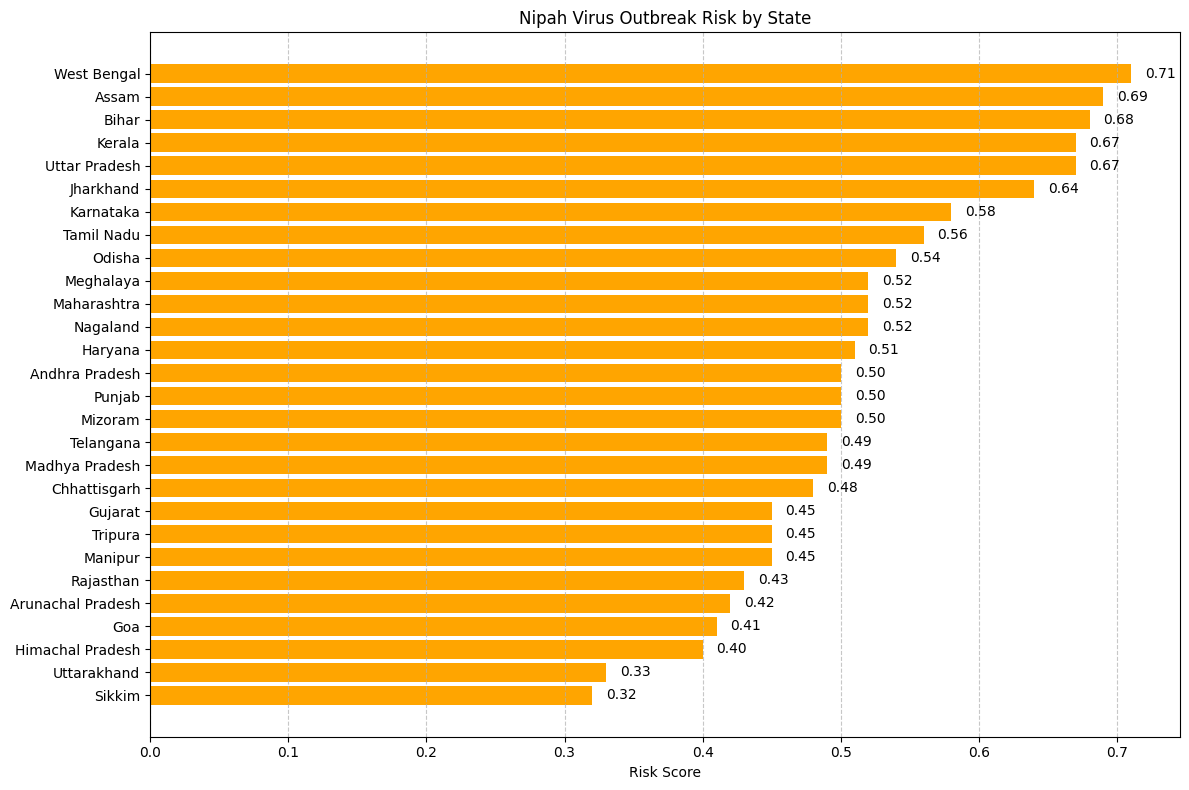

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# State-wise risk scores extracted from the image
data = {
    "State": [
        "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
        "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand", "Karnataka",
        "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram",
        "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu",
        "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal"
    ],
    "Risk Score": [
        0.5, 0.42, 0.69, 0.68, 0.48, 0.41, 0.45, 0.51, 0.4, 0.64, 0.58, 0.67,
        0.49, 0.52, 0.45, 0.52, 0.5, 0.52, 0.54, 0.5, 0.43, 0.32, 0.56, 0.49,
        0.45, 0.67, 0.33, 0.71
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort by risk score for better visualization
df = df.sort_values(by="Risk Score", ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df["State"], df["Risk Score"], color="orange")
plt.xlabel("Risk Score")
plt.title("Nipah Virus Outbreak Risk by State")
plt.gca().invert_yaxis()  # Highest risk at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate bars with values
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()


Creating parameters to state excel

In [ ]:
import pandas as pd
import json


json_data_string = """
{
  "regionData": [
    {
      "state": "Andhra Pradesh",
      "district": "",
      "parameters": {
        "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6
      }
    },
    {
      "state": "Andhra Pradesh", "district": "Visakhapatnam",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Andhra Pradesh", "district": "Vijayawada",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Arunachal Pradesh", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.3, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.2, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Arunachal Pradesh", "district": "Itanagar",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.3, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.2, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Assam", "district": "",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.9, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Assam", "district": "Guwahati",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.9, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Bihar", "district": "",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.3, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Bihar", "district": "Patna",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.3, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Chhattisgarh", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Chhattisgarh", "district": "Raipur",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Goa", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.8, "environmentalDegradation": 0.3 }
    },
    {
      "state": "Goa", "district": "Panaji",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.8, "environmentalDegradation": 0.3 }
    },
    {
      "state": "Gujarat", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.3, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.4 }
    },
    {
      "state": "Gujarat", "district": "Ahmedabad",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.3, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.4 }
    },
    {
      "state": "Haryana", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Haryana", "district": "Faridabad",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Himachal Pradesh", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.3 }
    },
    {
      "state": "Himachal Pradesh", "district": "Shimla",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.3 }
    },
    {
      "state": "Jharkhand", "district": "",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Jharkhand", "district": "Ranchi",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Karnataka", "district": "",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Karnataka", "district": "Bengaluru",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Kerala", "district": "",
      "parameters": { "batDensity": 0.9, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.8, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.8, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Kerala", "district": "Kozhikode",
      "parameters": { "batDensity": 0.9, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.8, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.8, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Kerala", "district": "Malappuram",
      "parameters": { "batDensity": 0.9, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.8, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.8, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Madhya Pradesh", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Madhya Pradesh", "district": "Bhopal",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Maharashtra", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Maharashtra", "district": "Mumbai",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.7, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Manipur", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Manipur", "district": "Imphal",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Meghalaya", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Meghalaya", "district": "Shillong",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Mizoram", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.3, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.9 }
    },
    {
      "state": "Mizoram", "district": "Aizawl",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.3, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.9 }
    },
    {
      "state": "Nagaland", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.3, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.9 }
    },
    {
      "state": "Nagaland", "district": "Kohima",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.3, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.9 }
    },
    {
      "state": "Odisha", "district": "",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Odisha", "district": "Bhubaneswar",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Punjab", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Punjab", "district": "Chandigarh",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.6 }
    },
    {
      "state": "Rajasthan", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Rajasthan", "district": "Jaipur",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.5, "healthcareInfrastructure": 0.4, "environmentalDegradation": 0.7 }
    },
    {
      "state": "Sikkim", "district": "",
      "parameters": { "batDensity": 0.3, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.2, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.2 }
    },
    {
      "state": "Sikkim", "district": "Gangtok",
      "parameters": { "batDensity": 0.3, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.2, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.2 }
    },
    {
      "state": "Tamil Nadu", "district": "",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Tamil Nadu", "district": "Chennai",
      "parameters": { "batDensity": 0.7, "pigFarmingIntensity": 0.5, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.7, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Telangana", "district": "",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Telangana", "district": "Hyderabad",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.7, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Tripura", "district": "",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Tripura", "district": "Agartala",
      "parameters": { "batDensity": 0.5, "pigFarmingIntensity": 0.4, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.6, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Uttar Pradesh", "district": "",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.3, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Uttar Pradesh", "district": "Lucknow",
      "parameters": { "batDensity": 0.6, "pigFarmingIntensity": 0.8, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.3, "environmentalDegradation": 0.8 }
    },
    {
      "state": "Uttarakhand", "district": "",
      "parameters": { "batDensity": 0.3, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.4, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.5 }
    },
    {
      "state": "Uttarakhand", "district": "Dehradun",
      "parameters": { "batDensity": 0.3, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.5, "humanPopulationDensity": 0.4, "healthcareInfrastructure": 0.5, "environmentalDegradation": 0.5 }
    },
    {
      "state": "West Bengal", "district": "",
      "parameters": { "batDensity": 0.8, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.6 }
    },
    {
      "state": "West Bengal", "district": "Kolkata",
      "parameters": { "batDensity": 0.8, "pigFarmingIntensity": 0.7, "fruitConsumptionPractices": 0.6, "humanPopulationDensity": 0.9, "healthcareInfrastructure": 0.6, "environmentalDegradation": 0.6 }
    }
  ],
  "parameterWeights": {
    "batDensity": 0.2, "pigFarmingIntensity": 0.2, "fruitConsumptionPractices": 0.2,
    "humanPopulationDensity": 0.15, "healthcareInfrastructure": 0.15, "environmentalDegradation": 0.1
  }
}
"""

# Load the JSON data
data = json.loads(json_data_string)
region_data = data['regionData']


state_level_data = []
for item in region_data:
    # Only process state-level entries (where district is empty string)
    if item['district'] == "":
        row = {'state': item['state']}
        row.update(item['parameters']) # Add parameter scores
        state_level_data.append(row)


df_states = pd.DataFrame(state_level_data)
df_states = df_states.set_index('state')


excel_filename = 'nipah_risk_parameters_by_state.xlsx'


try:
    df_states.to_excel(excel_filename, index=True) # index=True keeps the state names as the first column
    print(f"Successfully created Excel file: {excel_filename}")
except Exception as e:
    print(f"Error creating Excel file: {e}")

Successfully created Excel file: nipah_risk_parameters_by_state.xlsx


Loading the data file for all parameters and score

In [ ]:
# Step 1.1: Import pandas
import pandas as pd




excel_file_path = 'state_wise parameters.xlsx'


try:
    df_excel = pd.read_excel(excel_file_path, index_col='state')
    print("--- Experiment 1: Data Loaded Successfully ---")

    print(df_excel.head())

    # Check if 'OverallRiskScore' column exists, otherwise prompt user
    if 'OverallRiskScore' not in df_excel.columns:
         print("\nWarning: 'OverallRiskScore' column not found.")
         print("Please ensure it was calculated and saved in the Excel file, or recalculate it.")


except FileNotFoundError:
    print(f"Error: File not found at {excel_file_path}. Please upload the file or check the path.")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")

--- Experiment 1: Data Loaded Successfully ---
                   batDensity  pigFarmingIntensity  fruitConsumptionPractices  \
state                                                                           
Andhra Pradesh            0.5                  0.4                        0.7   
Arunachal Pradesh         0.5                  0.3                        0.5   
Assam                     0.7                  0.9                        0.6   
Bihar                     0.7                  0.8                        0.5   
Chhattisgarh              0.5                  0.4                        0.5   

                   humanPopulationDensity  healthcareInfrastructure  \
state                                                                 
Andhra Pradesh                        0.6                       0.5   
Arunachal Pradesh                     0.2                       0.5   
Assam                                 0.6                       0.5   
Bihar                         

Statewise ranking for risk scores


--- Experiment 2: Generating State Ranking Bar Chart ---


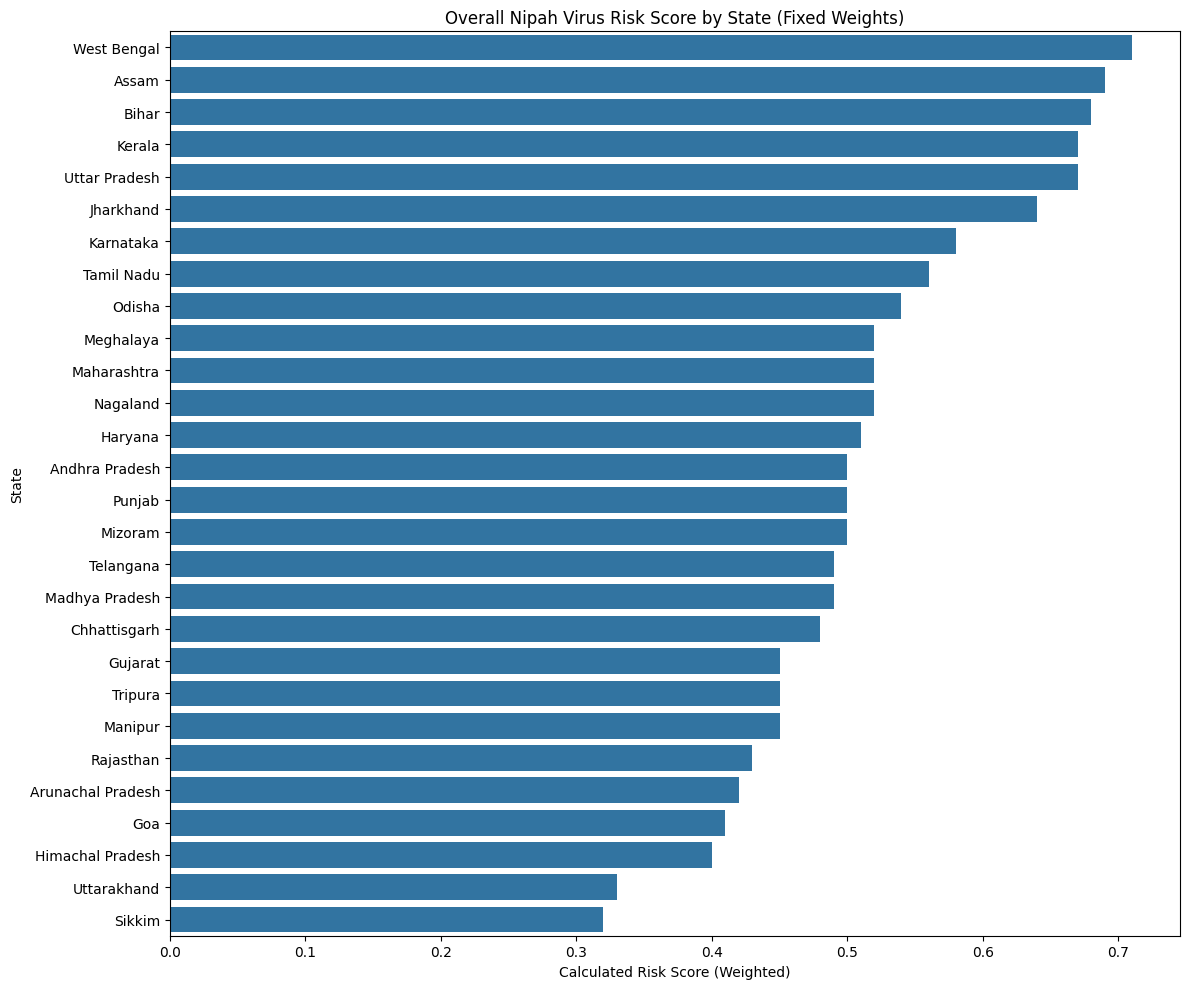

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


if 'df_excel' in locals() and 'OverallRiskScore' in df_excel.columns:
    print("\n--- Experiment 2: Generating State Ranking Bar Chart ---")

    df_sorted = df_excel.sort_values(by='OverallRiskScore', ascending=False)

    # Step 2.4: Create the bar chart
    plt.figure(figsize=(12, 10))
    sns.barplot(x=df_sorted['OverallRiskScore'], y=df_sorted.index)


    plt.title('Overall Nipah Virus Risk Score by State (Fixed Weights)')
    plt.xlabel('Calculated Risk Score (Weighted)')
    plt.ylabel('State')


    plt.tight_layout()


    plt.show()
else:
    print("Cannot run Experiment 2: DataFrame 'df_excel' not loaded or 'OverallRiskScore' column missing.")

Showing the clustering


--- Experiment 5: Clustering States by Risk Profile ---
Note: Elbow method code is commented out. Choose 'k' based on prior analysis or uncomment to run.
Performing K-Means clustering with k=4

States grouped into 4 clusters:

Cluster 0: (10 states)
['Andhra Pradesh', 'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Punjab', 'Tamil Nadu', 'Telangana']

Cluster 1: (10 states)
['Arunachal Pradesh', 'Chhattisgarh', 'Haryana', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Rajasthan', 'Tripura']

Cluster 2: (5 states)
['Assam', 'Bihar', 'Jharkhand', 'Uttar Pradesh', 'West Bengal']

Cluster 3: (3 states)
['Himachal Pradesh', 'Sikkim', 'Uttarakhand']

Average Parameter Scores per Cluster:
         batDensity  pigFarmingIntensity  fruitConsumptionPractices  \
Cluster                                                               
0          0.590000                 0.44                   0.670000   
1          0.510000                 0.47                 

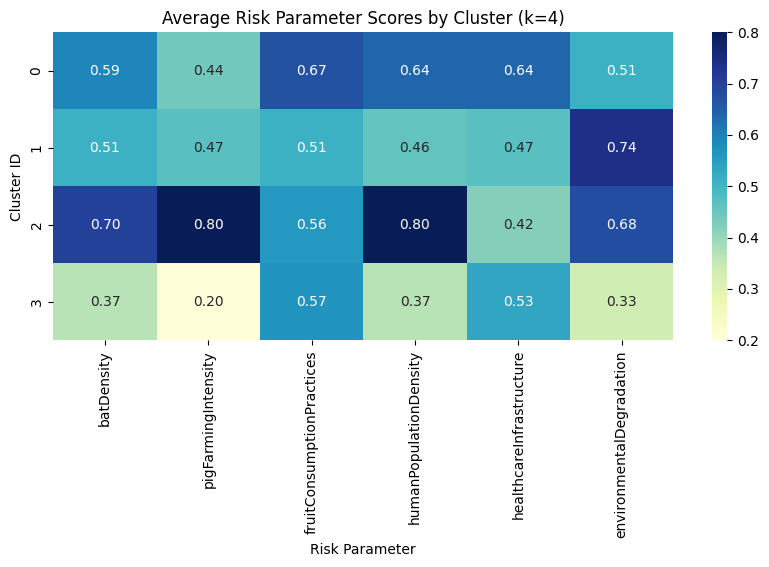

In [ ]:
# Import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np # For potential NaN handling if needed later
import matplotlib.pyplot as plt
import seaborn as sns


if 'df_excel' in locals():
    print("\n--- Experiment 5: Clustering States by Risk Profile ---")
    # Select parameter columns
    param_cols = ["batDensity", "pigFarmingIntensity", "fruitConsumptionPractices",
                  "humanPopulationDensity", "healthcareInfrastructure", "environmentalDegradation"]
    df_params_only = df_excel[param_cols].copy()

    # Handle potential NaN values before scaling (if any)
    if df_params_only.isnull().values.any():
        print("Warning: NaN values found in parameter data. Filling with column means.")
        df_params_only = df_params_only.fillna(df_params_only.mean())

    # Step 5.4: Scale the data
    scaler = StandardScaler()
    scaled_params = scaler.fit_transform(df_params_only)

    # Elbow Method to find optimal k (optional)
    # distortions = []
    # K = range(1, 10)
    # for k_val in K:
    #     kmeanModel = KMeans(n_clusters=k_val, random_state=42, n_init=10)
    #     kmeanModel.fit(scaled_params)
    #     distortions.append(kmeanModel.inertia_)
    # plt.figure(figsize=(8,4))
    # plt.plot(K, distortions, 'bx-')
    # plt.xlabel('k (Number of Clusters)')
    # plt.ylabel('Distortion (Inertia)')
    # plt.title('Elbow Method For Optimal k')
    # plt.show()
    # --- Manually choose k based on the plot ---
    print("Note: Elbow method code is commented out. Choose 'k' based on prior analysis or uncomment to run.")

    #Choose k
    k = 4 # choose 4 clusters based on visual inspection or elbow method
    print(f"Performing K-Means clustering with k={k}")

    # Perform K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_params)

    # Add cluster labels to DataFrame
    df_excel['Cluster'] = cluster_labels

    #Display states in each cluster
    print(f"\nStates grouped into {k} clusters:")
    for i in range(k):
        cluster_states = df_excel[df_excel['Cluster'] == i].index.tolist()
        print(f"\nCluster {i}: ({len(cluster_states)} states)")
        print(cluster_states)

    # Analyze cluster characteristics
    # Use original parameter data for interpretable means
    cluster_summary = df_excel.groupby('Cluster')[param_cols].mean()
    print("\nAverage Parameter Scores per Cluster:")
    print(cluster_summary)

    # Visualize cluster centroids
    plt.figure(figsize=(10, 4))
    sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'Average Risk Parameter Scores by Cluster (k={k})')
    plt.ylabel('Cluster ID')
    plt.xlabel('Risk Parameter')
    plt.show()
else:
    print("Cannot run Experiment 5: DataFrame 'df_excel' not loaded.")

The analysis successfully grouped the states into 4 distinct clusters, each representing a different type of Nipah virus risk profile based on the combination of the six parameters from the "Nipah Virus Risk Mapping_.docx" document.

Cluster 0: High Consumption/Density & Healthcare States

States (10): Andhra Pradesh, Goa, Gujarat, Karnataka, Kerala, Madhya Pradesh, Maharashtra, Punjab, Tamil Nadu, Telangana.

Profile: Characterized by relatively high fruit consumption practices (average 0.67) and good healthcare infrastructure (average 0.64). They also have moderate-to-high bat density (0.59) and human population density (0.64), but lower average pig farming intensity (0.44) compared to Cluster 2. Environmental degradation is moderate (0.51).
Interpretation: This group includes many southern, western, or economically developed states. While they have better healthcare capacity on average, factors like high fruit production/consumption and significant human density maintain a considerable risk level. Kerala stands out within this group due to its exceptionally high individual parameter scores related to past outbreaks.

Cluster 1: Environmentally Stressed & Moderate Risk States

States (10): Arunachal Pradesh, Chhattisgarh, Haryana, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Rajasthan, Tripura.
Profile: The defining characteristic is very high environmental degradation (average 0.74). Other parameters are moderate or moderate-low, including bat density (0.51), pig farming (0.47), fruit consumption (0.51), population density (0.46), and healthcare (0.47).
Interpretation: This cluster contains many northeastern states  along with others facing significant environmental challenges like deforestation  or pollution. The high environmental degradation might influence bat habitats and increase human-wildlife interaction risk, combined with moderate scores elsewhere. Pig farming is notably high in specific NE states within this cluster.


Cluster 2: High Density, Farming & Low Healthcare States (Highest Concern Profile)

States (5): Assam, Bihar, Jharkhand, Uttar Pradesh, West Bengal.
Profile: This cluster scores highest on average for bat density (0.70), pig farming intensity (0.80), and human population density (0.80). Critically, it also has the lowest average healthcare infrastructure score (0.42). Environmental degradation is also relatively high (0.68).
Interpretation: This group represents arguably the most concerning risk profile. It combines high densities of potential reservoirs (bats ), intermediate hosts (pigs ), and humans  with the lowest capacity (healthcare ) to detect or manage an outbreak. This aligns with the presence of states with past outbreaks (West Bengal ) and states identified as high risk in the source document.


Cluster 3: Low Overall Risk / Himalayan States

States (3): Himachal Pradesh, Sikkim, Uttarakhand.
Profile: Characterized by low scores across most risk parameters, particularly bat density (0.37), pig farming (0.20), human population density (0.37), and environmental degradation (0.33). Healthcare infrastructure is moderate (0.53), and fruit consumption is moderate (0.57).
Interpretation: These are primarily Himalayan states [cite: 121-127, 239-246, 288-294]. Based on the parameters used in the model derived from the source document, this group exhibits the lowest overall baseline risk profile.
What this tells you for your research:

Heterogeneity of Risk: The clustering confirms the statement in the source document  about significant heterogeneity in risk profiles across India. Risk isn't uniform; different combinations of factors drive risk in different regions.
Targeted Interventions: Public health strategies could potentially be tailored based on these cluster profiles.

Cluster 2: May require urgent focus on strengthening healthcare, surveillance (human and animal), and possibly biosecurity in pig farming.

Cluster 1: Might benefit from interventions addressing environmental degradation, managing human-wildlife interfaces, alongside general healthcare improvements.

Cluster 0: Could leverage existing healthcare capacity for enhanced surveillance, focusing on mitigating risks from fruit consumption and population density.

Cluster 3: Appears lowest priority based on this specific model but still warrants basic surveillance.
Beyond Weighted Score: Clustering provides insights that go beyond a single ranked list based on weighted scores. It highlights that states with similar overall scores might have very different underlying risk factor combinations.

Statewise Risk assessment

Risk score data loaded from Excel.
Geospatial data loaded from '/content/india geojson file.json'.
Merging risk data with map data using state names (Index vs 'name')...
Generating Choropleth map...
Adding annotations...


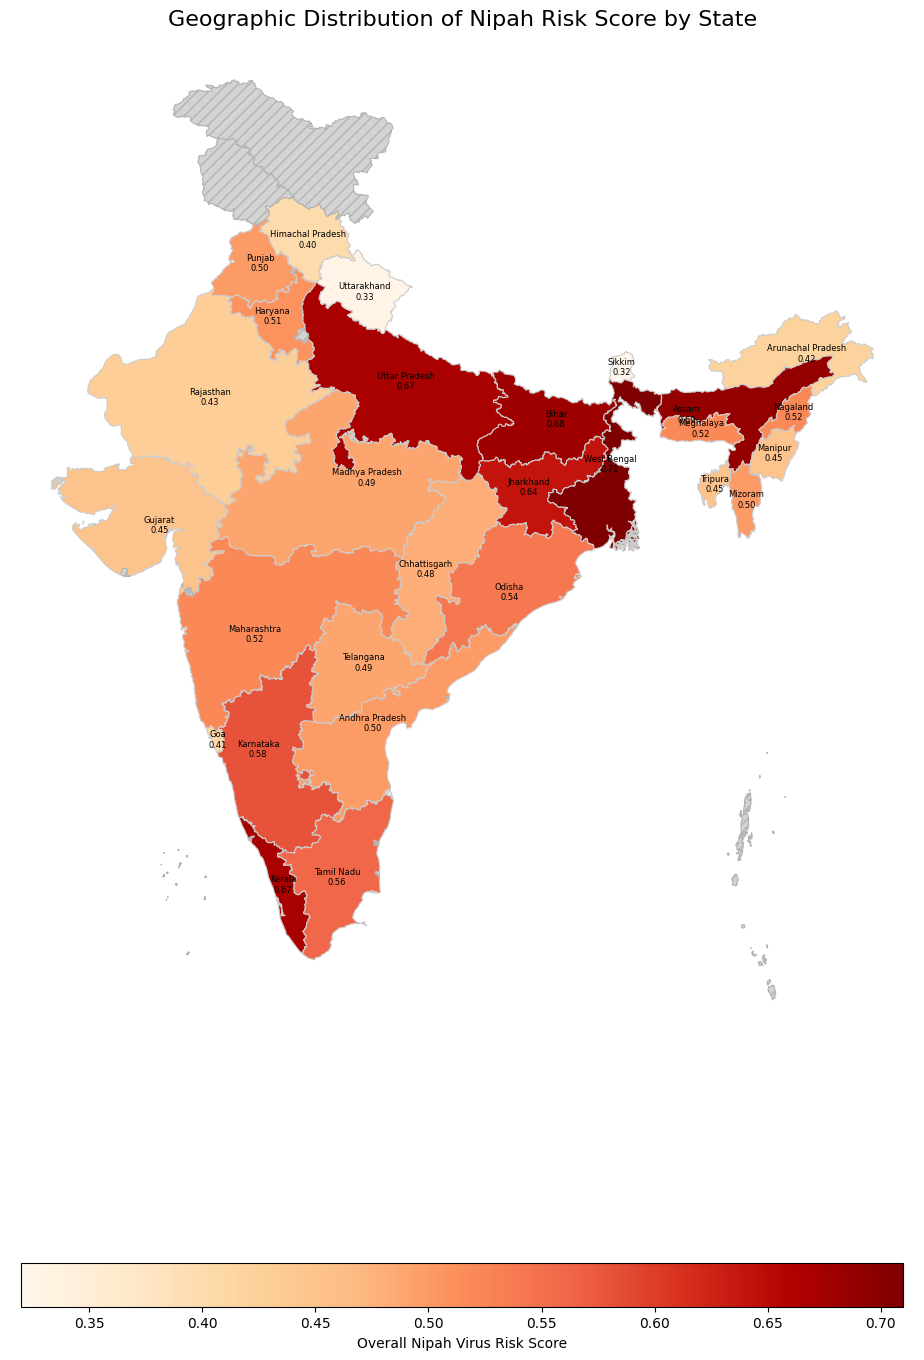

Map generation complete with annotations.

NOTE: Text labels may overlap significantly, especially for smaller or complex-shaped states.
You may need to adjust 'fontsize' in the plt.text() function or use specialized libraries for better label placement.


In [ ]:
# Install geopandas
!pip install geopandas

# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Load your risk score data from the Excel file

excel_file_path = 'state_wise parameters.xlsx'
try:
    df_excel = pd.read_excel(excel_file_path, index_col='state')
    print("Risk score data loaded from Excel.")
    if 'OverallRiskScore' not in df_excel.columns:
        raise ValueError("'OverallRiskScore' column not found in the Excel file.")
except FileNotFoundError:
    print(f"ERROR: Excel file not found at '{excel_file_path}'. Please upload it and check the path.")
    exit()
except ValueError as ve:
    print(f"ERROR: {ve}")
    exit()
except Exception as e:
    print(f"An error occurred loading the Excel file: {e}")
    exit()

# Load the geospatial data (India States Map from GeoJSON)


geospatial_file_path = '/content/india geojson file.json'

state_name_column_in_map = 'name'

try:
    india_map_gdf = gpd.read_file(geospatial_file_path)
    print(f"Geospatial data loaded from '{geospatial_file_path}'.")
    if state_name_column_in_map not in india_map_gdf.columns:
        raise ValueError(f"Property key '{state_name_column_in_map}' not found in the GeoJSON file. Available properties are: {india_map_gdf.columns.tolist()}")
except FileNotFoundError:
    print(f"ERROR: Geospatial file not found at '{geospatial_file_path}'. Please upload it and check the path.")
    exit()
except ValueError as ve:
    print(f"ERROR: {ve}")
    exit()
except Exception as e:
    print(f"An error occurred loading the geospatial file: {e}")
    exit()


#Merge the risk score data with the geospatial data
print(f"Merging risk data with map data using state names (Index vs '{state_name_column_in_map}')...")
df_excel_reset = df_excel.reset_index()
merged_gdf = india_map_gdf.merge(
    df_excel_reset,
    left_on=state_name_column_in_map,
    right_on='state',
    how='left'
)

# Plot the base Choropleth Map
print("Generating Choropleth map...")
fig, ax = plt.subplots(1, 1, figsize=(15, 15)) # Make figure larger to accommodate text

merged_gdf.plot(
    column='OverallRiskScore',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Overall Nipah Virus Risk Score",
        'orientation': "horizontal",
        'shrink': 0.6
        },
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "0.7",
        "hatch": "///",
        "label": "Missing data",
    }
)


print("Adding annotations...")
for idx, row in merged_gdf.iterrows():
    # Get the state name from the GeoJSON property
    state_name = row[state_name_column_in_map]
    # Get the risk score
    risk_score = row['OverallRiskScore']


    if pd.notna(risk_score):

        point = row['geometry'].representative_point()
        # Format the text label (State Name on line 1, Score on line 2)
        label = f"{state_name}\n{risk_score:.2f}"


        plt.text(
            x=point.x,
            y=point.y,
            s=label,
            horizontalalignment='center', # Center the text horizontally
            verticalalignment='center',   # Center the text vertically
            fontsize=6,                 # Adjust font size (smaller usually needed)
            color='black',              # Text color

        )



#Customize and Show Plot
ax.set_axis_off()
ax.set_title('Geographic Distribution of Nipah Risk Score by State', fontdict={'fontsize': '16', 'fontweight' : '3'})
plt.tight_layout() # Try to adjust layout
plt.show()

print("Map generation complete with annotations.")
print("\nNOTE: Text labels may overlap significantly, especially for smaller or complex-shaped states.")
print("You may need to adjust 'fontsize' in the plt.text() function or use specialized libraries for better label placement.")

"The visualization clearly highlights the spatial heterogeneity of Nipah virus risk across India, as suggested in the source document."

"We can observe distinct areas of higher calculated risk, indicated by the darker colors. For instance, states like West Bengal (0.71), Assam (0.69), Bihar (0.68), Kerala (0.67), and Uttar Pradesh (0.67) emerge as having the highest composite risk scores according to our model."
"Conversely, states like Sikkim (0.32), Uttarakhand (0.33), Himachal Pradesh (0.40), and Goa (0.41) show considerably lower overall risk scores, represented by the lighter shades."

 The map shows a concentration of high-risk states (Cluster 2 from our analysis) in the eastern and Gangetic plains region (WB, Bihar, UP, Jharkhand, Assam), characterized by factors like high population density, significant pig farming, and lower healthcare scores. Kerala represents a distinct high-risk profile in the south, while the Himalayan states (Cluster 3) consistently show lower risk."

**VISUALIZATION BY CLUSTER**

Geospatial data loaded from '/content/india geojson file.json'.
Merging cluster data with map data using state names (Index vs 'name')...
Generating Choropleth map by Cluster...
Adding state name annotations...


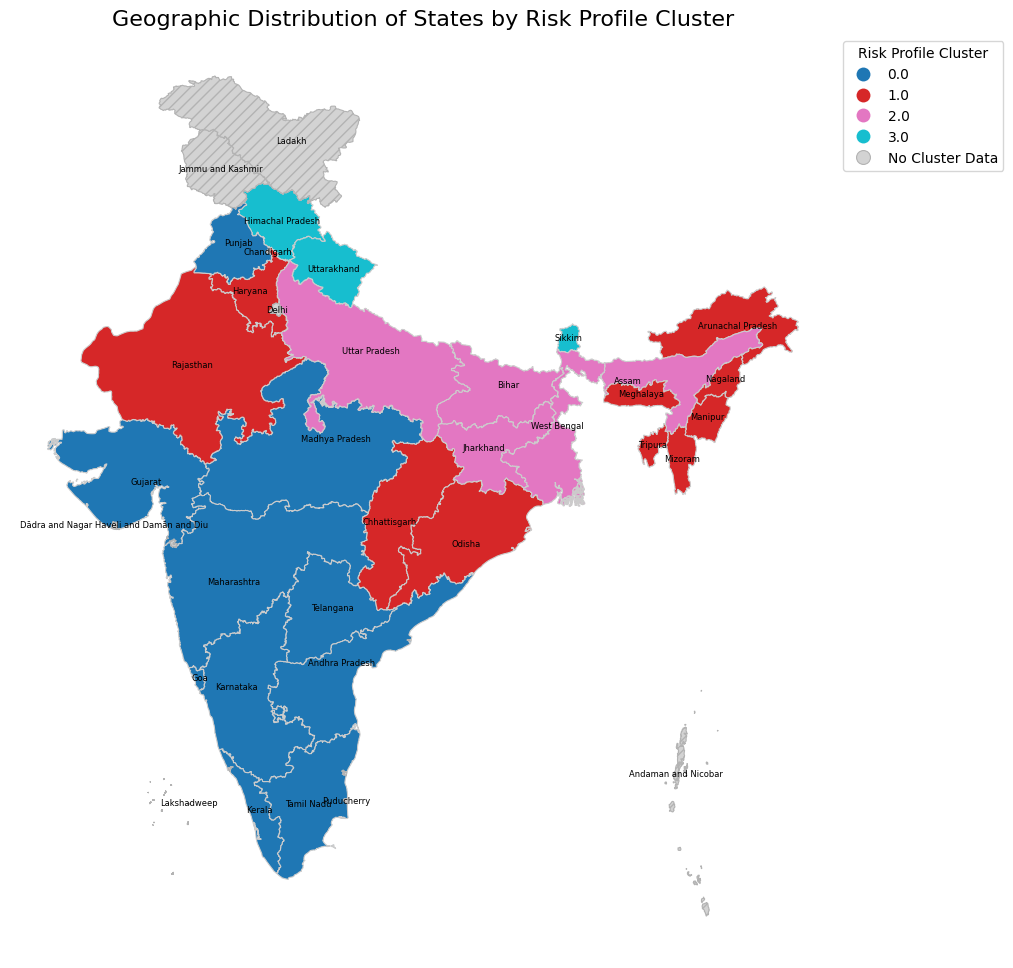

Cluster map generation complete with state names.


In [ ]:
#Install geopandas
!pip install geopandas

#Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Prerequisite: Ensure df_excel is loaded and contains 'Cluster' ---
# Example: Load from Excel if not already loaded
# excel_file_path = 'nipah_risk_parameters_by_state.xlsx' # Make sure this file has the Cluster column saved
# try:
#     df_excel = pd.read_excel(excel_file_path, index_col='state')
#     print("Risk score and Cluster data loaded from Excel.")
#     if 'Cluster' not in df_excel.columns:
#          raise ValueError("'Cluster' column not found. Please run Experiment 5 (Clustering) first and save/load the results.")
# except FileNotFoundError:
#     print(f"ERROR: Excel file not found at '{excel_file_path}'.")
#     exit()
# except ValueError as ve:
#     print(f"ERROR: {ve}")
#     exit()
# except Exception as e:
#     print(f"An error occurred loading the Excel file: {e}")
#     exit()



#Load the geospatial data (India States Map from GeoJSON)


geospatial_file_path = '/content/india geojson file.json'

state_name_column_in_map = 'name'

try:
    india_map_gdf = gpd.read_file(geospatial_file_path)
    print(f"Geospatial data loaded from '{geospatial_file_path}'.")
    if state_name_column_in_map not in india_map_gdf.columns:
        raise ValueError(f"Property key '{state_name_column_in_map}' not found in the GeoJSON file. Available properties: {india_map_gdf.columns.tolist()}")
except FileNotFoundError:
    print(f"ERROR: Geospatial file not found at '{geospatial_file_path}'.")
    exit()
except ValueError as ve:
    print(f"ERROR: {ve}")
    exit()
except Exception as e:
    print(f"An error occurred loading the geospatial file: {e}")
    exit()


# Merge the Cluster data with the geospatial data
# Ensure df_excel exists and has the 'Cluster' column
if 'df_excel' not in locals() or 'Cluster' not in df_excel.columns:
     print("ERROR: 'df_excel' DataFrame with 'Cluster' column not found. Please run clustering first.")
     exit()

print(f"Merging cluster data with map data using state names (Index vs '{state_name_column_in_map}')...")
df_excel_reset = df_excel.reset_index()

# Perform the merge
merged_gdf_cluster = india_map_gdf.merge(
    df_excel_reset[['state', 'Cluster']], # Only merge state and Cluster columns
    left_on=state_name_column_in_map,
    right_on='state',
    how='left' # Keep all map geometries
)

# Plot the Choropleth Map by Cluster
print("Generating Choropleth map by Cluster...")
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

merged_gdf_cluster.plot(
    column='Cluster',
    categorical=True,
    cmap='tab10',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'title': "Risk Profile Cluster",
        'loc': 'upper left',
        'bbox_to_anchor':(1, 1)
        },
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "0.7",
        "hatch": "///",
        "label": "No Cluster Data",
    }
)

#Add Annotations (State Names)
print("Adding state name annotations...")
for idx, row in merged_gdf_cluster.iterrows():
    state_name = row[state_name_column_in_map]
    point = row['geometry'].representative_point()

    plt.text(
        x=point.x,
        y=point.y,
        s=state_name,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=6,
        color='black'
    )

# Final Map Styling and Show Plot
ax.set_axis_off()
ax.set_title('Geographic Distribution of States by Risk Profile Cluster', fontdict={'fontsize': '16'})
plt.show()

print("Cluster map generation complete with state names.")